# Analyzing Prosper Loan Data

<br/>

## Introduction

This notebook goals is investigate a dataset with loan record. Through analysis I hope find patterns and insights that hellp us to understand better loan behaviour.  
The original dataset can be downloaded by [this link](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000).

## Preliminar Wrangling

In [1]:
#Import data manipulation tool
import pandas as pd
import numpy as np

#Import datavis tool
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#set default values for fontsize and figure size
FONTSIZE = 18
FIGSIZE = (12, 4)

In [3]:
#Import dataset
df_loan = pd.read_csv('./resources/prosperLoanData.csv')

#Verify dataframe size
df_loan.shape

(113937, 81)

This dataset contain 113,937 record and 81 features. That's a lot of information to explore and for this investigation I'll delimit better.  
Let's take a overview to be familiar with data, here a [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) with description of each feature.

In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

After studying the data dictionary, I reached a list of 26 feature that could be interesting to investigate, so let's focus o that.

In [5]:
# list of features to analize
to_analize = ['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 
              'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)',
              'ProsperRating (Alpha)', 'ListingCategory (numeric)', 
              'ProsperScore', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 
              'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable',
              'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'Investors',
              'OnTimeProsperPayments', 
             ]

df_loan = df_loan[to_analize]

print('Shape of new dataset:', df_loan.shape)
df_loan.info()

Shape of new dataset: (113937, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingCreationDate        113937 non-null  object 
 2   CreditGrade                28953 non-null   object 
 3   Term                       113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   ClosedDate                 55089 non-null   object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   LenderYield                113937 non-null  float64
 9   ProsperRating (numeric)    84853 non-null   float64
 10  ProsperRating (Alpha)      84853 non-null   object 
 11  ListingCategory (numeric)  113937 non-null  int64  
 12  ProsperScore               84853 non-null   float64

#### Convert Datetime Columns
Before doing the analysis, I need to clean the dataset, such a convert date field to datetime type and category type columns like CreditGrade and LoanStatus.

In [6]:
convert_to_date = ['ListingCreationDate', 'ClosedDate', 'LoanOriginationDate']

#Convert datatime column
for feature in convert_to_date:
    df_loan[feature] = pd.to_datetime(df_loan[feature], format="%Y/%m/%d")

df_loan[convert_to_date].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  113937 non-null  datetime64[ns]
 1   ClosedDate           55089 non-null   datetime64[ns]
 2   LoanOriginationDate  113937 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 2.6 MB


In [7]:
print('First record:', df_loan['ListingCreationDate'].min())
print('Last record:',  df_loan['ListingCreationDate'].max())

First record: 2005-11-09 20:44:28.847000
Last record: 2014-03-10 12:20:53.760000


After a quick view, I decided that investigate a prosper score could be a good subject, for futher analysis it will keep only row that contain this information.  
As we can see in data dictionary, prosper score is applicable only after July 2009, so to we will consider loan created after 2010 and since we don't have record from all month of 2014, for this analysis will be demilited a interval from 2010 to 2013.

In [8]:
#Create a mask to filter only record created between 2010 and 2013
time_interval = (df_loan['ListingCreationDate'].dt.year >= 2010) & (df_loan['ListingCreationDate'].dt.year <=2013)

#Creating subdateset where only ProsperScore are filled and between 2010 and 2013
df_loan = df_loan[(~df_loan['ProsperScore'].isnull()) & time_interval]

#Reset index
df_loan.reset_index(drop=True, inplace=True)
df_loan.shape

(71941, 26)

In [9]:
duration = df_loan['ListingCreationDate'].max() - df_loan['ListingCreationDate'].min()

print('First record:', df_loan['ListingCreationDate'].min())
print('Last record:',  df_loan['ListingCreationDate'].max())
print('Duration of dataset:', duration)

First record: 2010-01-01 05:45:42.067000
Last record: 2013-12-31 22:28:19.927000
Duration of dataset: 1460 days 16:42:37.860000


To get easy futher analysis, we merge where Income Range is equal to 'Not employed', 'Not displayed' and '$0' to one category

In [10]:
to_merge = ['Not employed', 'Not displayed']

df_loan['IncomeRange'] = df_loan['IncomeRange'].apply(lambda x: '$0' if x in to_merge else x)
df_loan['IncomeRange'].value_counts()

$50,000-74,999    21476
$25,000-49,999    20752
$100,000+         12714
$75,000-99,999    12199
$1-24,999          4135
$0                  665
Name: IncomeRange, dtype: int64

#### Categorical type  
Analyzing dataset we can see some features that are categorical type and need convertion. Also, is necessary to determine sort order

In [11]:
#Create a dictionary to order and transform all categorical dtype
ordinal_var_dict = {
    'CreditGrade' : ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
    'ProsperRating (Alpha)' : ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
    'IncomeRange' : ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
    'LoanStatus' : ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 
                    'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
                    'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
                    'Past Due (>120 days)']}

categorical_columns = ['CreditGrade', 'ProsperRating (Alpha)', 'LoanStatus', 'Occupation', 'EmploymentStatus']

for column in categorical_columns:
    df_loan[column] = df_loan[column].astype('category')


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(categories = ordinal_var_dict[var], ordered=True)
    
    df_loan[var] = df_loan[var].astype(ordered_var)


df_loan[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71941 entries, 0 to 71940
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CreditGrade            0 non-null      category
 1   ProsperRating (Alpha)  71941 non-null  category
 2   LoanStatus             71941 non-null  category
 3   Occupation             71130 non-null  category
 4   EmploymentStatus       71941 non-null  category
dtypes: category(5)
memory usage: 355.9 KB


Since Credit grade has no value in now, it will be dropped too.

In [12]:
df_loan.drop('CreditGrade', axis=1, inplace=True)

It could be interesting if we can group loan amount?

In [13]:
#Create labels of value range
labels = ["{0} - {1}".format(i, i + 2501) for i in range(0, 25000, 2500)]

df_loan['LoanOriginalAmountRange'] = pd.cut(df_loan['LoanOriginalAmount'], range(0, 27500, 2500), labels=labels)
df_loan['LoanOriginalAmountRange'].value_counts().sort_index()

0 - 2501          7271
2500 - 5001      22755
5000 - 7501       8026
7500 - 10001     12385
10000 - 12501     3193
12500 - 15001    11491
15000 - 17501      771
17500 - 20001     2827
20000 - 22501      369
22500 - 25001     2387
Name: LoanOriginalAmountRange, dtype: int64

We can apply pandas correlation function, as we can see further, in categorical data type.  
To avoid this issue, we will create a new column to IncomeRange, where it will be filled with int value, so we can sort and analyze correlation with other features.

In [14]:
cat_income = list(df_loan['IncomeRange'].value_counts().sort_index().index)

df_loan['catIncomeRange'] = df_loan['IncomeRange'].apply(lambda x: cat_income.index(x)).astype(int)

#### Dealing with NaN 
Dataset we have two columns with NaN or Null? EmploymentStatusDuration and OnTimeProsperPayment.  
In EmploymentStatus, we can see NaN where job duration was not possible to determine, and in OnTime when borrower hadn't loan before the new loan. In both case, it will filled with 0.

In [15]:
#fill all nan with 0
df_loan['EmploymentStatusDuration'].fillna(0.0, inplace=True)
df_loan['OnTimeProsperPayments'].fillna(0, inplace=True)


#Convert features into interger
convert_to_int = ['ProsperScore', 'EmploymentStatusDuration', 'OnTimeProsperPayments', 'ProsperRating (numeric)',
                  'CreditScoreRangeLower', 'CreditScoreRangeUpper']

for feature in convert_to_int:
    df_loan[feature] = df_loan[feature].astype('int')

df_loan[convert_to_int].describe()

,ProsperScore,EmploymentStatusDuration,OnTimeProsperPayments,ProsperRating (numeric),CreditScoreRangeLower,CreditScoreRangeUpper
count,71941.000000,71941.000000,71941.000000,71941.000000,71941.000000,71941.000000
mean,5.888005,102.957757,5.861845,3.969336,700.095634,719.095634
std,2.346199,96.685554,14.073848,1.681550,47.903176,47.903176
min,1.000000,0.000000,0.000000,1.000000,600.000000,619.000000
25%,4.000000,31.000000,0.000000,3.000000,660.000000,679.000000
50%,6.000000,74.000000,0.000000,4.000000,700.000000,719.000000
75%,8.000000,147.000000,0.000000,5.000000,740.000000,759.000000
max,11.000000,755.000000,134.000000,7.000000,880.000000,899.000000


In data dictionary, we can see that score goes from 0 to 10, so row with different value will be dropped.

In [16]:
#Create a list with index where prosperscore are 11
prosper_score11 = df_loan.query('ProsperScore == 11').index
df_loan.drop(prosper_score11, axis=0, inplace=True)

df_loan['ProsperScore'].value_counts().sort_index()

1       949
2      5048
3      6500
4     10404
5      8787
6     10715
7      8953
8     10323
9      5561
10     3812
Name: ProsperScore, dtype: int64

In [17]:
#save clean dataset
df_loan.to_csv('./resources/cleanProsperLoanData.csv')

## Analysis  
Now let's plot some charts to understand the dataset.  
First, I want to see how prosper rating are distributed.

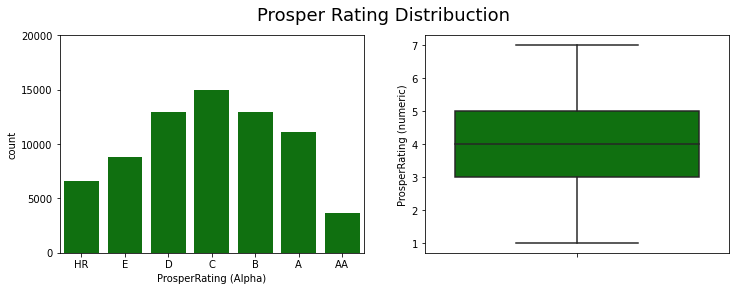

count    71052.000000
mean         3.939594
std          1.668535
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ProsperRating (numeric), dtype: float64

In [18]:
plt.figure(figsize=FIGSIZE)

plt.suptitle('Prosper Rating Distribuction', fontsize=FONTSIZE)
plt.subplot(1, 2, 1)
sns.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color='g')
plt.yticks(np.arange(0, 20001, 5000))

plt.subplot(1, 2, 2)
sns.boxplot(data=df_loan, y='ProsperRating (numeric)', color='g')

plt.show()

df_loan['ProsperRating (numeric)'].describe()


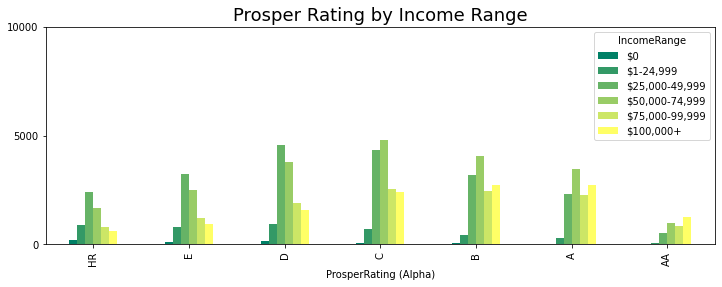

In [19]:
df_loan.groupby(['ProsperRating (Alpha)', 'IncomeRange', ])['ListingKey'].\
                count().unstack().plot(kind='bar', colormap='summer', figsize=FIGSIZE)

plt.title('Prosper Rating by Income Range', fontsize=FONTSIZE)
plt.yticks(np.arange(0, 10001, 5000))

plt.show()

The data distribution seems balanced, with a big proportion in the center interval. That is, most part of borrower had middle rating (D, C and B) when loan was created.  
Now, let's see loan status.

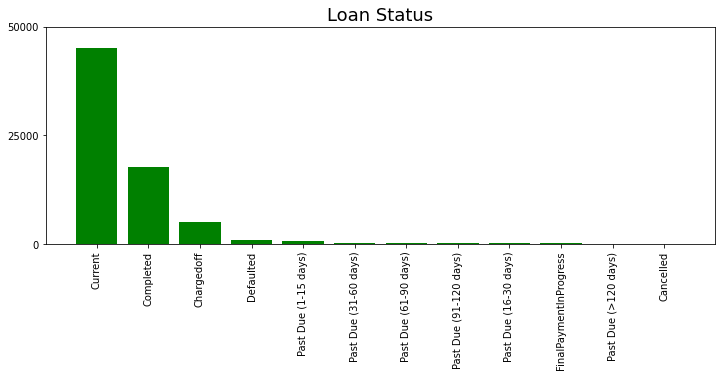

In [20]:
loan_status_count = df_loan['LoanStatus'].value_counts()

plt.figure(figsize=FIGSIZE)

plt.bar(loan_status_count.index, loan_status_count.values, color='g')
plt.title('Loan Status', fontsize=FONTSIZE)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 50001, 25000))
plt.show()

Most of loan still opened.
Let's see when loan was created.

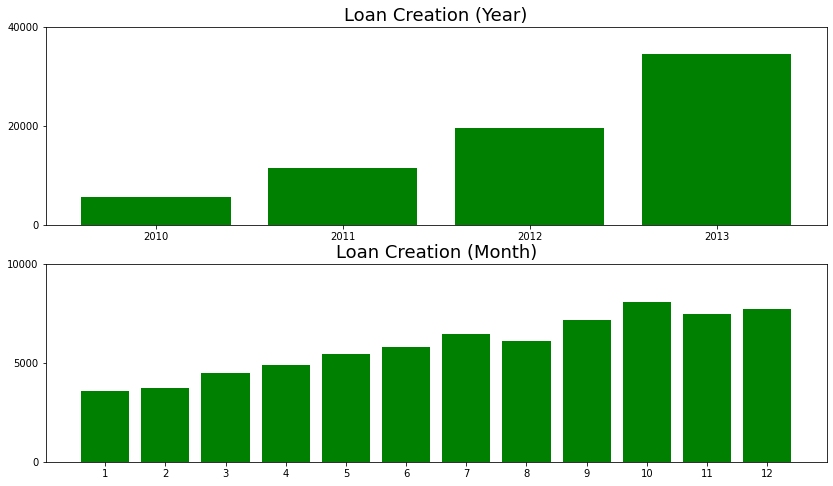

In [21]:
#Creation series with loan created divided by period
loan_creation_year = (df_loan['ListingCreationDate']).dt.year.value_counts()
loan_creation_month = (df_loan['ListingCreationDate']).dt.month.value_counts()

plt.figure(figsize=(14, 8))

#Plot loan creatin by year
plt.subplot(2, 1, 1)
plt.title('Loan Creation (Year)', fontsize=FONTSIZE)
plt.bar(loan_creation_year.index, loan_creation_year, color='g')
plt.xticks(np.arange(2010, 2014, 1))
plt.yticks(np.arange(0, 40001, 20000))

#Plot loan creatin by Month
plt.subplot(2, 1, 2)
plt.title('Loan Creation (Month)', fontsize=FONTSIZE)
plt.bar(loan_creation_month.index, loan_creation_month, color='g')
plt.yticks(np.arange(0, 10001, 5000))
plt.xticks(np.arange(1, 13, 1))

plt.show()

Looking by year we can see that loan are increasing. Could be a coincidence, but can related with recovery from 2007-2008 financial crisis.

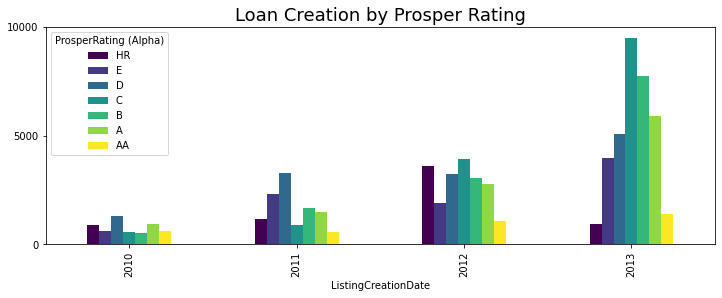

In [22]:
df_loan.groupby([df_loan['ListingCreationDate'].dt.year, 'ProsperRating (Alpha)'])['ListingKey'].\
                count().unstack().plot(kind='bar', colormap='viridis', figsize=FIGSIZE)

plt.title('Loan Creation by Prosper Rating', fontsize=FONTSIZE)
plt.yticks(np.arange(0, 10001, 5000))

plt.show()

Some findings about loan creation:
* There are increasing trend of creation of listing year by year;
* Borrower with C rank loan has increased more than other classes;
* Well rated borrowers keeped loan creation level.

<br/>

For the next, we are going to see fator for loan was created.

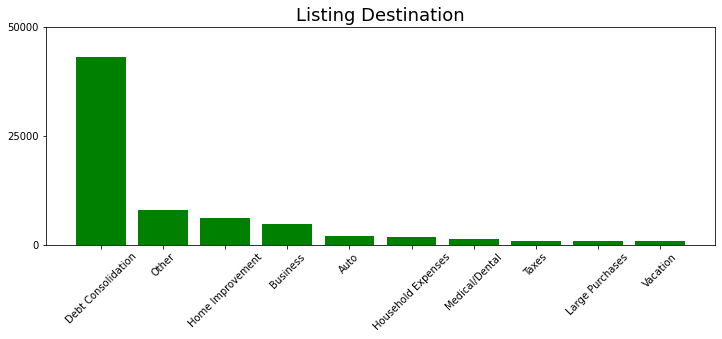

In [23]:
#Creating list with reason to loan
listing_category_index = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 
                          'Personal Loan', 'Student Use', 'Auto', 'Other', 
                          'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring',
                          'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental',
                          'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']

#ordered list with listing grouped by category
listing_category = df_loan['ListingCategory (numeric)'].value_counts().sort_index()

#List of 10 most common list reason
top_ten_listing = list(listing_category.sort_values(ascending=False)[:10].index)
top_ten_listing_legend = []

#Append in legend list a description of listing
for reason in top_ten_listing:
    top_ten_listing_legend.append(listing_category_index[reason])


plt.figure(figsize=FIGSIZE)
plt.title('Listing Destination', fontsize=FONTSIZE)
plt.bar(top_ten_listing_legend, listing_category.sort_values(ascending=False)[:10], color='g')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 50001, 25000))

plt.show()

So, most loan was made to consolidate prior debts.  
I want to see if there is a pattern in all income range.

/home/johnny/Documents/dev/curso-data-science/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/johnny/Documents/dev/curso-data-science/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1584x1296 with 0 Axes>

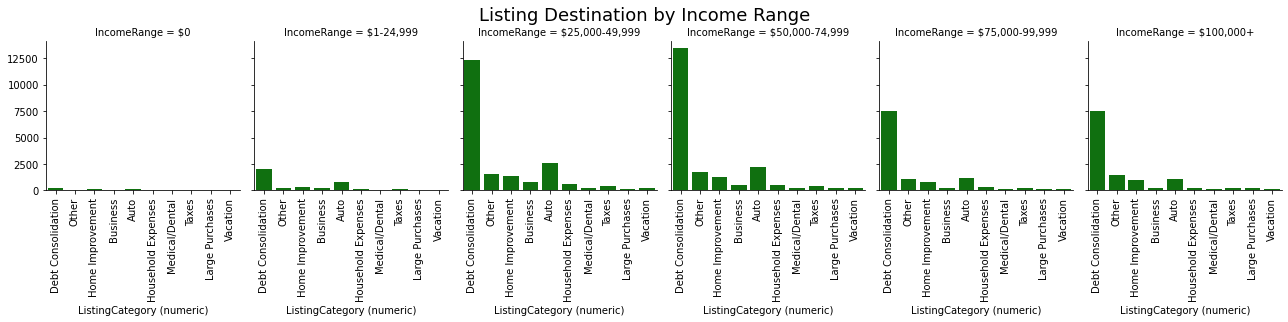

In [24]:
color = {'color': ["g"]}

sub_df = df_loan[df_loan['ListingCategory (numeric)'].isin(top_ten_listing)]

plt.figure(figsize=(22, 18))

g = sns.FacetGrid(data=sub_df, col='IncomeRange', size=3, aspect=1, hue_kws=color)
g.map(sns.countplot, 'ListingCategory (numeric)')
g.set(xticklabels=top_ten_listing_legend)
g.set_xticklabels(rotation=90)
plt.suptitle('Listing Destination by Income Range', fontsize=FONTSIZE, verticalalignment='baseline')
plt.show()

Debt Consolidation still been predominant in all income range, more clearer in middle category (\\$25k - \\$49k and \\$50k - \\$74k). Loan to purchase auto is the next most common reason from middle to higher classes.  
For the next, let's take a look to Loan amount.

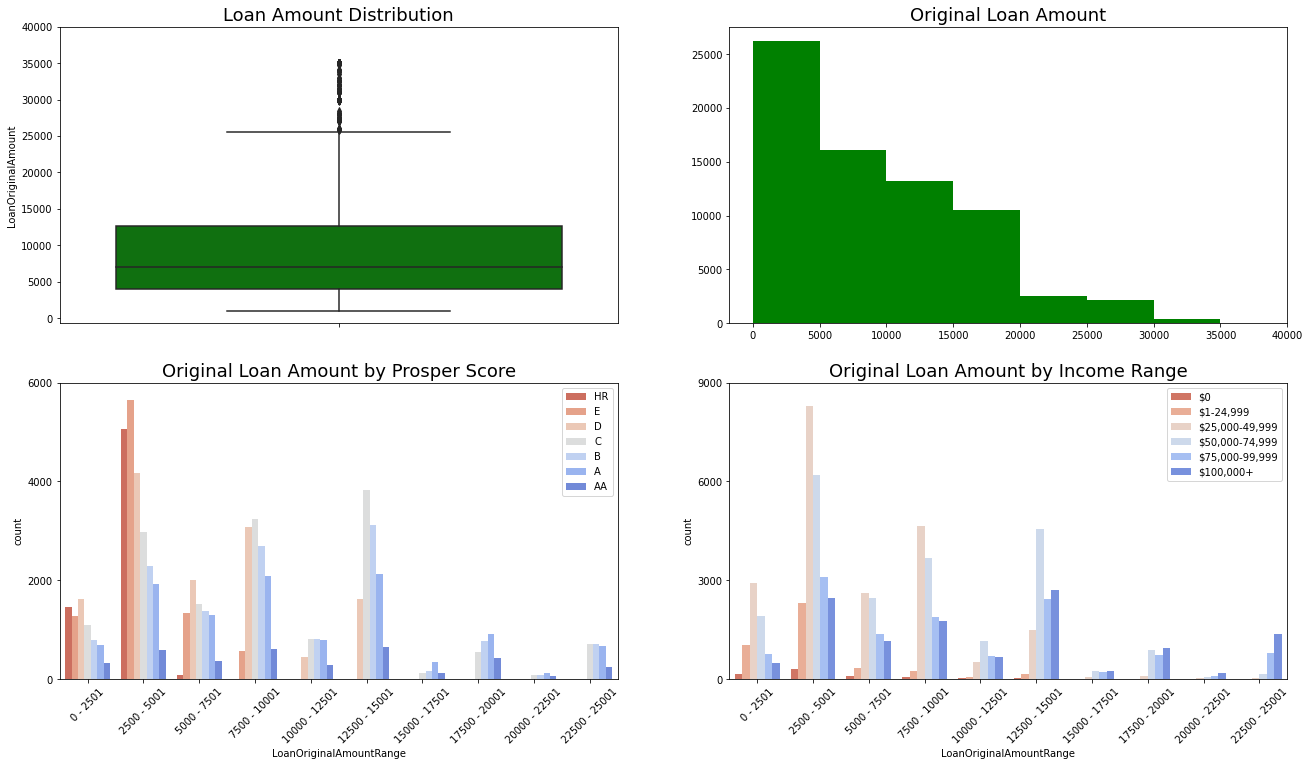

In [25]:
#Define binsize
binsize = 5000
bins = np.arange(0, df_loan['LoanOriginalAmount'].max() + binsize, binsize)

# plt.figure(figsize=FIGSIZE)
plt.figure(figsize=(22, 12))

plt.subplot(2, 2, 1)
plt.title('Loan Amount Distribution', fontsize=FONTSIZE)
sns.boxplot(data=df_loan, y='LoanOriginalAmount', color='g')
plt.yticks(np.arange(0, 40001, 5000))


plt.subplot(2, 2, 2)
plt.title('Original Loan Amount', fontsize=FONTSIZE)

#Fist plot, with all loan amount without segregation
plt.hist(data=df_loan, x='LoanOriginalAmount', bins=bins, color='g')
plt.xticks(np.arange(0, 40001, 5000))
plt.yticks(np.arange(0,25001, 5000))

#Second plot, now separeted by prosperScore
# plt.figure(figsize=FIGSIZE)
plt.subplot(2, 2, 3)
plt.title('Original Loan Amount by Prosper Score', fontsize=FONTSIZE)

sns.countplot(data=df_loan, x='LoanOriginalAmountRange', hue='ProsperRating (Alpha)', palette='coolwarm_r')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 6001, 2000))
plt.legend(loc='upper right')


# plt.figure(figsize=FIGSIZE)
plt.subplot(2, 2, 4)
plt.title('Original Loan Amount by Income Range', fontsize=FONTSIZE)

sns.countplot(data=df_loan, x='LoanOriginalAmountRange', hue='IncomeRange', palette='coolwarm_r')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 9001, 3000))
plt.legend(loc='upper right')

plt.show()

As expected, the loan amount plot is right skewed - In the first two plot we can see that almost 70% of loan value are bellow \\$15k. The last two plot segregate by prosper score and income range respectively. Here the conclusion it that borrower with lower score do not take great loan, and higher class dont take much loans, maybe because his financial condition is sufficient to invet.

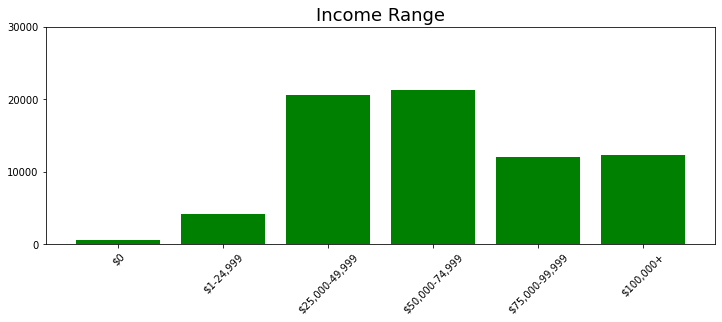

In [26]:
income_range = df_loan['IncomeRange'].value_counts().sort_index()

plt.figure(figsize=FIGSIZE)

plt.title('Income Range', fontsize=FONTSIZE)
plt.bar(income_range.index, income_range, color='g')
plt.yticks(np.arange(0, 30001, 10000))
plt.xticks(rotation=45)

plt.show()

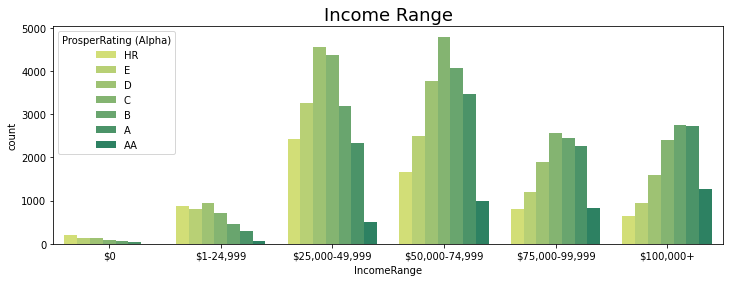

In [27]:
plt.figure(figsize=FIGSIZE)
plt.title('Income Range', fontsize=FONTSIZE)
sns.countplot(data=df_loan, x='IncomeRange', hue='ProsperRating (Alpha)', palette='summer_r')

plt.show()

These two plot indicated that the more higher is your income range, your prosper rating tend to be better.  
Now we are going to take a look in correlation between features.

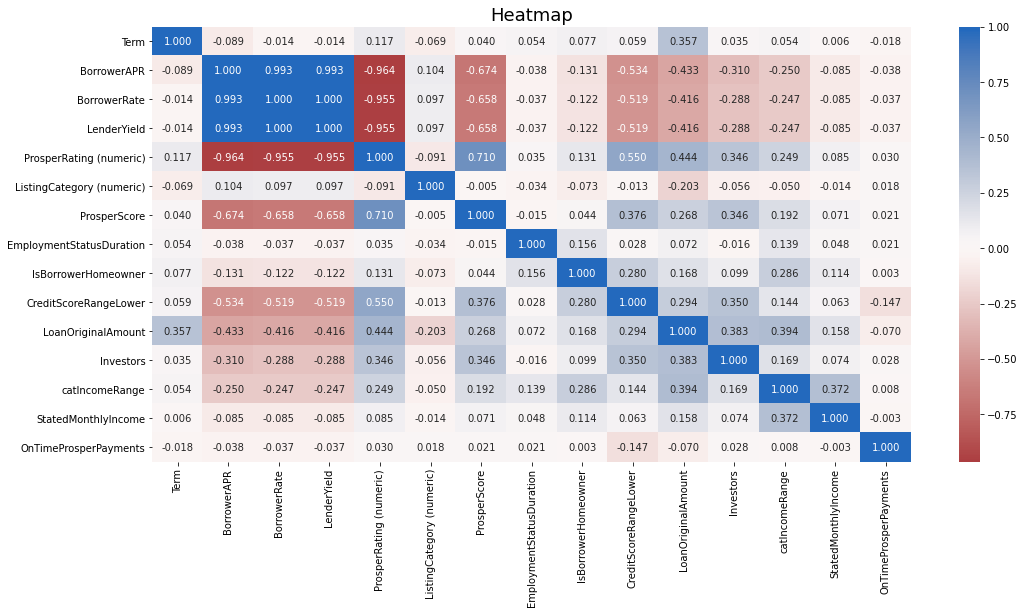

In [28]:
#Define what features to see the correlation
features = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 
            'ProsperRating (numeric)', 'ListingCategory (numeric)', 'ProsperScore', 'EmploymentStatusDuration', 
            'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanOriginalAmount', 'Investors', 'catIncomeRange',
            'StatedMonthlyIncome', 'OnTimeProsperPayments']

#Create a dataframe with correlation of features defined above
corr = df_loan[features].corr()

plt.figure(figsize=(17, 8))
plt.title('Heatmap', fontsize=FONTSIZE)
sns.heatmap(corr, annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

Here some observation about correlation:
* Borrower APR, Borrower Rate and Lender Yiel has strong correlation among then;
* Prosper Rating has strong negative correlation with Borrower APR, Borrower Rate and Lender Yiel - That indicate more higher is your rating, les is your rate;
* Loading Amount has interesting correlation with Prosper Rating (positive) and rate feature (negative);
* Apparently duration of employment has no influence in borrower rate;
* Listing category does not influence no one other feature too.

Now we have more idea of what to investigate. First let's take a look about loan rate.

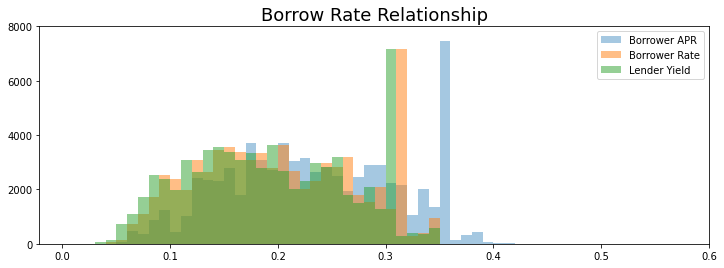

In [29]:
binsize=0.01
bins = np.arange(0, df_loan['BorrowerAPR'].max() + binsize, binsize)

plt.figure(figsize=FIGSIZE)
plt.title('Borrow Rate Relationship', fontsize=FONTSIZE)
plt.hist(data=df_loan, x='BorrowerAPR', bins=bins, alpha=0.4, label='Borrower APR')
plt.hist(data=df_loan, x='BorrowerRate', bins=bins, alpha=0.5, label='Borrower Rate')
plt.hist(data=df_loan, x='LenderYield', bins=bins, alpha=0.5, label='Lender Yield')
plt.xticks(np.arange(0, 0.61, 0.1))
plt.yticks(np.arange(0, 8001, 2000))
plt.legend()
plt.show()

These three features has almost same shape.  
For the next, I want to see what influence has prosper rating above borrower rate.

/home/johnny/Documents/dev/curso-data-science/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1584x1296 with 0 Axes>

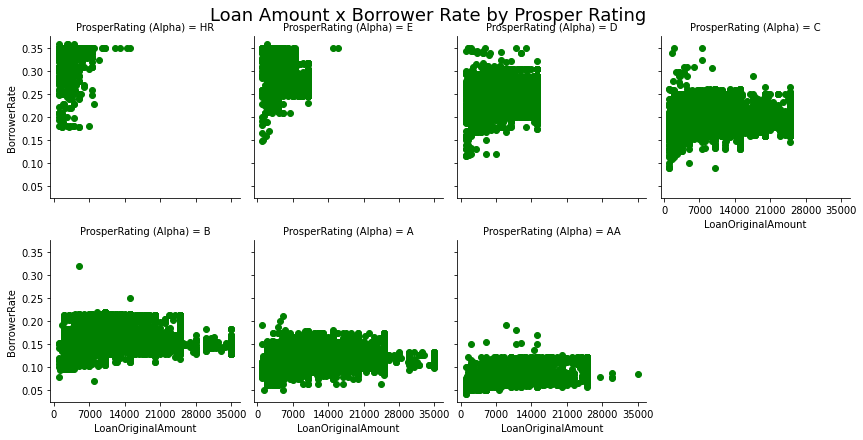

In [30]:
plt.figure(figsize=(22, 18))
g = sns.FacetGrid(data=df_loan, col='ProsperRating (Alpha)', size=3, aspect=1, hue_kws=color, col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
g.fig.suptitle('Loan Amount x Borrower Rate by Prosper Rating', fontsize=FONTSIZE, verticalalignment='baseline')
g.set(xticks=np.arange(0, 35001, 7000))
plt.show()

As we can see, higher prosper rating give to borrower smaller rate, regardless amount.

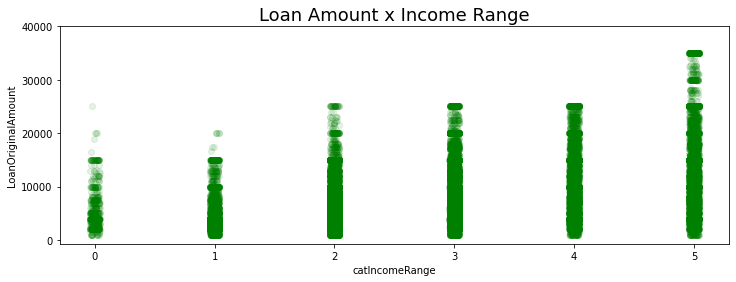

In [31]:
plt.figure(figsize=FIGSIZE)

plt.title('Loan Amount x Income Range', fontsize=FONTSIZE)
sns.regplot(data=df_loan, x='catIncomeRange', y='LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False, color='g')
plt.yticks(np.arange(0, 40001, 10000))
plt.show()

Naturally, person with higher income range takes bigger loan.

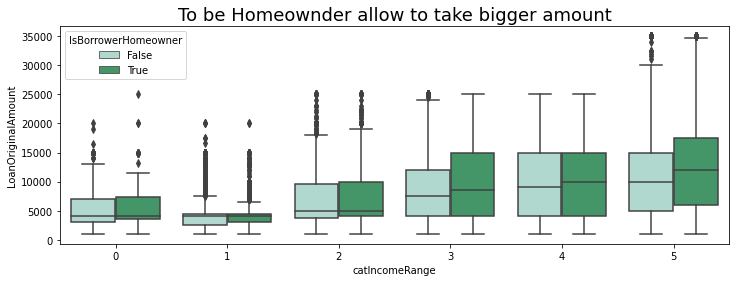

In [32]:
plt.figure(figsize=FIGSIZE)

plt.title('To be Homeownder allow to take bigger amount', fontsize=FONTSIZE)
sns.boxplot(data=df_loan, x='catIncomeRange', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='BuGn')
plt.show()

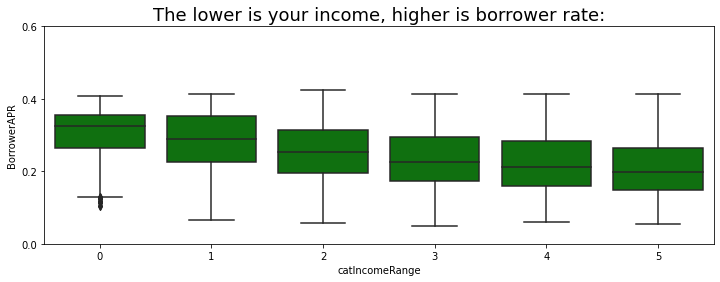

In [33]:
plt.figure(figsize=FIGSIZE)

plt.title('The lower is your income, higher is borrower rate:', fontsize=FONTSIZE)
sns.boxplot(data=df_loan, x='catIncomeRange', y='BorrowerAPR', color='g')
plt.yticks(np.arange(0, 0.7, 0.2))

plt.show()